In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
import csv
import mplcursors

from statistics import stdev

In [2]:
HDR_PATH_1 = '/data/iphone_808080_1_2023-07-12_002/results/REFLECTANCE_2023-07-12_002.hdr'
HDR_PATH_2 = '/data/iphone_808080_2_2023-07-12_003/results/REFLECTANCE_2023-07-12_003.hdr'
HDR_PATH_3 = '/data/iphone_808080_3_2023-07-12_004/results/REFLECTANCE_2023-07-12_004.hdr'
HDR_PATH_4 = '/data/iphone_808080_4_2023-07-24_005/results/REFLECTANCE_2023-07-24_005.hdr'
HDR_PATH_5 = '/data/iphone_808080_5_2023-07-24_007/results/REFLECTANCE_iphone_808080_2023-07-24_007.hdr'

IMG_PATH_1 = '/data/iphone_808080_1_2023-07-12_002/results/REFLECTANCE_2023-07-12_002.png'
IMG_PATH_2 = '/data/iphone_808080_2_2023-07-12_003/results/REFLECTANCE_2023-07-12_003.png'
IMG_PATH_3 = '/data/iphone_808080_3_2023-07-12_004/results/REFLECTANCE_2023-07-12_004.png'
IMG_PATH_4 = '/data/iphone_808080_4_2023-07-24_005/results/REFLECTANCE_2023-07-24_005.png'
IMG_PATH_5 = '/data/iphone_808080_5_2023-07-24_007/results/REFLECTANCE_iphone_808080_2023-07-24_007.png'

# hdr_paths = [HDR_PATH_1,HDR_PATH_2,HDR_PATH_3,HDR_PATH_4,HDR_PATH_5]
hdr_paths = [HDR_PATH_2,HDR_PATH_3]
# img_paths = [IMG_PATH_1,IMG_PATH_2,IMG_PATH_3,IMG_PATH_4,IMG_PATH_5]
img_paths = [IMG_PATH_2,IMG_PATH_3]

In [3]:
spec_imgs = []
for path in hdr_paths:
    spec_imgs.append(envi.open(path))

coors=[[180,180],[200,180],[220,180],[180,200],[180,220],[300,200],[310,200],[300,200],[300,180]]

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_1)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

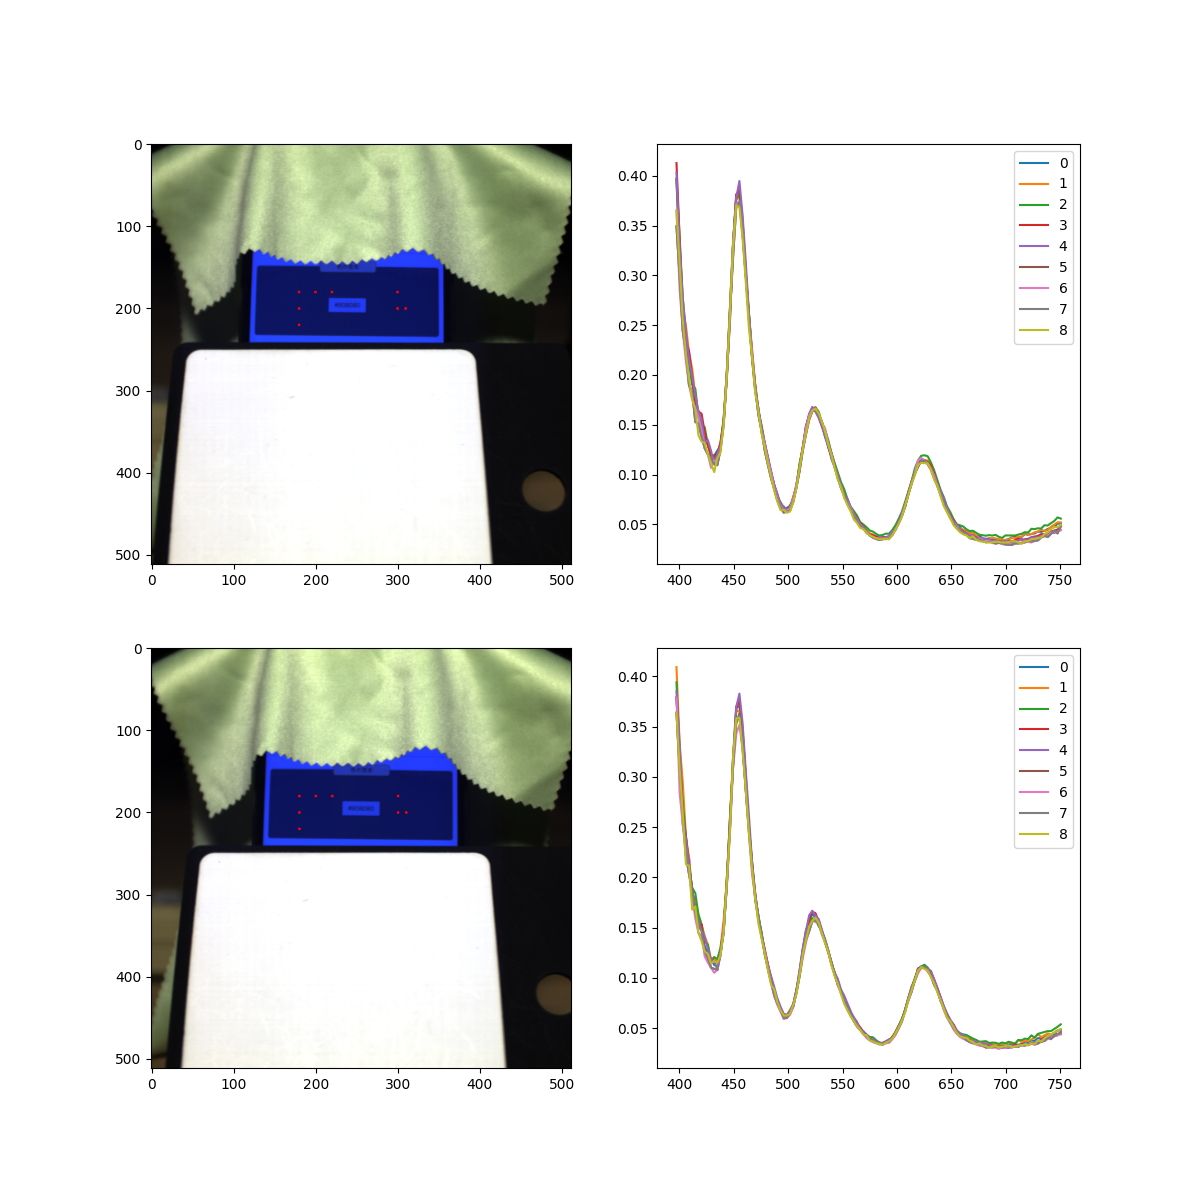

In [5]:
dots = [-1,0,1]
color = (255,0,0)

fig = plt.figure(figsize=(12,12))
row = len(spec_imgs)
num = 1
axs = [0]*len(spec_imgs)
x = wave_lengthes[:121]
for i,spec in enumerate(spec_imgs):
    specs = []
    image = Image.open(img_paths[i])
    for coor in coors:
        specs.append(spec.read_pixel(512-coor[0],coor[1]))
        for i in dots:
            for j in dots:
                image.putpixel((int(coor[0]+i), int(coor[1])+j), color)
    fig.add_subplot(row,2,num)
    plt.imshow(image)
    axs[i] = fig.add_subplot(row,2,num+1)
    for j,elem in enumerate(specs):
        axs[i].plot(x,elem[:121],label=j)
    axs[i].legend()
    num += 2

plt.show()



In [6]:
def all_spec_to_std(coors,spec_imgs):
    spec_per_wl = [[] for j in range(204)]
    for spec in spec_imgs:
        for coor in coors:
            reflects = spec.read_pixel(int(512-coor[0]),int(coor[1]))
            for i,reflect in enumerate(reflects):
                spec_per_wl[i].append(reflect)

    std = []
    for elem in spec_per_wl:
        std.append(np.std(elem))
    return std

In [7]:
def mean_spec_to_std(coors,spec_imgs):
    spec_wl = [[] for j in range(204)]#それぞれの平均したスペクトルを格納
    std_per_img = []

    for spec in spec_imgs:
        spec_per_img = [[] for j in range(204)]#一つの画像内の指定した座標のスペクトルを複数保存
        spec_mean = []
        for coor in coors:
            reflects = spec.read_pixel(int(512-coor[0]),int(coor[1]))
            for i,reflect in enumerate(reflects):
                spec_per_img[i].append(reflect)
    #指定した座標のスペクトルを波長ごとに保存
        for elem in spec_per_img:
            spec_mean.append(np.mean(elem))
    #一つの画像の波長ごとの平均値を格納した変数ができた。
        for i,elem in enumerate(spec_mean):
            spec_wl[i].append(elem)
    #さらにそれを波長ごとに配列で保存
    for elem in spec_wl:
        std_per_img.append(np.std(elem))
    return std_per_img

In [8]:
all_spec_std = all_spec_to_std(coors,spec_imgs)
mean_spec_std = mean_spec_to_std(coors,spec_imgs)
rgb=[20,44,78]
for i in rgb:
    print(all_spec_std[i])
for i in rgb:
    print(mean_spec_std[i])

0.010840003
0.0038324364
0.0024681948
0.00700064
0.003241904
0.0018661544
